<a href="https://colab.research.google.com/github/valeraboyko2002/test/blob/main/%D0%BF%D1%80%D0%B5%D0%BF%D1%80%D0%BE%D1%86%D0%B5%D1%81%D1%81%D0%B8%D0%BD%D0%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Основные составляющие проекта


#### Анализ и изучение данных
На начальном этапе проводится детальное исследование данных: определяются уникальные значения для каждого параметра, анализируется их распределение. Выполняется статистический анализ, при необходимости уточняются названия столбцов для обеспечения единообразия.

#### Обработка и очистка данных
Процесс очистки данных включает выявление и корректную обработку пропущенных значений и аномалий. Устраняются дублирующиеся записи, идентифицируются статистические выбросы.

Конкретные меры включают:
- Замену нулевых значений в столбце "возраст" на NaN
- Устранение пропусков через удаление строк или заполнение средними/медианными значениями

#### Исследовательский анализ
На этом этапе извлекаются ценная информация из обработанных данных:
- Фильтрация по заданным критериям (возраст > 40, зарплата < 5000)
- Визуализация взаимосвязи возраста и уровня дохода
- Анализ географического распределения с графическим представлением

#### Преобразование категориальных данных
Для работы алгоритмов машинного обучения категориальные переменные преобразуются в числовой формат с использованием методов:
- One-hot encoding
- Label encoding

#### Нормализация признаков
Завершающий этап - приведение признаков к единому масштабу с применением:
- Стандартизации (StandardScaler)
- Масштабирования к заданному диапазону (MinMaxScaler)

In [219]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [220]:
url = "https://raw.githubusercontent.com/valeraboyko2002/test/main/Employee.csv"
df = pd.read_csv(url)

df.shape

(148, 6)

In [221]:
df.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [222]:
df.duplicated().sum()

np.int64(4)

In [223]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [224]:
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  136 non-null    object 
 1   Age      127 non-null    float64
 2   Salary   121 non-null    float64
 3   Place    130 non-null    object 
 4   Country  144 non-null    object 
 5   Gender   144 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 6.9+ KB


In [226]:
unique=df.nunique()
unique

,0
Company,6
Age,29
Salary,40
Place,11
Country,1
Gender,2


In [227]:
df.Company.unique()

array(['TCS', 'Infosys', 'CTS', nan, 'Tata Consultancy Services',
       'Congnizant', 'Infosys Pvt Lmt'], dtype=object)

In [228]:
df['Company'].replace('Infosys Pvt Lmt','Infosys',inplace=True)
df['Company'].replace('Tata Consultancy Services','TCS',inplace=True)
df['Company'].replace('CTS','Congnizant',inplace=True)
df['Company'].replace('Congnizant','Cognizant',inplace=True)
df['Company'].unique()

/tmp/ipython-input-4075095943.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Company'].replace('Infosys Pvt Lmt','Infosys',inplace=True)
/tmp/ipython-input-4075095943.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

array(['TCS', 'Infosys', 'Cognizant', nan], dtype=object)

In [229]:
df['Place'].unique()

array(['Chennai', 'Mumbai', 'Calcutta', 'Delhi', 'Podicherry', 'Cochin',
       nan, 'Noida', 'Hyderabad', 'Bhopal', 'Nagpur', 'Pune'],
      dtype=object)

### Чистка

In [230]:
df1 = df.copy()

In [231]:
df1.describe()

,Age,Salary,Gender
count,127.000000,121.000000,144.000000
mean,30.527559,5283.471074,0.222222
std,11.114717,2585.373600,0.417191
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,33.000000,5000.000000,0.000000
75%,37.500000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [232]:
# min age = 0, min salary = 1000 (???)
q1=df1['Age'].quantile(0.25)
q3=df1['Age'].quantile(0.75)
iqr = q3 - q1
iqr

np.float64(15.5)

In [233]:
lower=q1-1.5*iqr
upper=q3+1.5*iqr

In [234]:
upper

np.float64(60.75)

In [235]:
lower

np.float64(-1.25)

In [236]:
df1[(df1['Age']<lower) & (df1['Age']>upper)]

,Company,Age,Salary,Place,Country,Gender


In [237]:
q1 = df.Salary.quantile(.25)
q3 = df.Salary.quantile(.75)
iqr = q3 - q1
iqr

np.float64(4970.0)

In [238]:
lower = q1-1.5*iqr
higher = q3-1.5*iqr

In [239]:
lower

np.float64(-4425.0)

In [240]:
higher

np.float64(545.0)

In [241]:
df1[((df1['Salary']<lower) & (df1['Salary']>upper))]

,Company,Age,Salary,Place,Country,Gender


In [242]:
# пропущенные значения
df.isnull().sum()

,0
Company,8
Age,17
Salary,23
Place,14
Country,0
Gender,0


In [243]:
# находим самую частую компанию, метод с удалением строк с пустым значением я не приветствую, данных и так мало
df1['Company'].mode()[0]

'TCS'

In [244]:
df1['Company'].fillna(df1['Company'].mode()[0], inplace=True)

/tmp/ipython-input-1866371499.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Company'].fillna(df1['Company'].mode()[0], inplace=True)


In [245]:
# возраст заполним средним значением а значения 0 поменяем на NaN
df[df['Age']==0]

,Company,Age,Salary,Place,Country,Gender
87,Infosys,0.0,3030.0,Calcutta,India,0
91,TCS,0.0,3045.0,Delhi,India,0
100,Cognizant,0.0,2034.0,Podicherry,India,0
106,TCS,0.0,9024.0,Chennai,India,1
110,Infosys,0.0,3234.0,Mumbai,India,0
120,Cognizant,0.0,1234.0,Calcutta,India,0


In [246]:
df1['Age'] = df1['Age'].replace(0, np.nan)

In [247]:
df1.isna().sum()

,0
Company,0
Age,23
Salary,23
Place,14
Country,0
Gender,0


In [248]:
df1.describe()

,Age,Salary,Gender
count,121.000000,121.000000,144.000000
mean,32.041322,5283.471074,0.222222
std,8.989250,2585.373600,0.417191
min,17.000000,1089.000000,0.000000
25%,23.000000,3030.000000,0.000000
50%,33.000000,5000.000000,0.000000
75%,40.000000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [249]:
rounded_mean_age = round(df1.Age.mean(),0)
rounded_mean_age

np.float64(32.0)

In [250]:
df1['Age'].fillna(rounded_mean_age,inplace=True)

/tmp/ipython-input-3848563089.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Age'].fillna(rounded_mean_age,inplace=True)


In [251]:
df1.isna().sum()

,0
Company,0
Age,0
Salary,23
Place,14
Country,0
Gender,0


In [252]:
# зарплада
rounded_mean_salary = round(df1.Salary.mean(),0)
df1.Salary.fillna(rounded_mean_salary,inplace=True)

/tmp/ipython-input-1240480511.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1.Salary.fillna(rounded_mean_salary,inplace=True)


In [253]:
df1.isna().sum()

,0
Company,0
Age,0
Salary,0
Place,14
Country,0
Gender,0


In [254]:
place_mode = df1.Place.mode()[0]
df1.Place.fillna(place_mode,inplace=True)
df1.Place.isna().sum()

/tmp/ipython-input-2377113004.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1.Place.fillna(place_mode,inplace=True)


np.int64(0)

Теперь датасет является очищеным

Переходим к анализу

In [255]:
df1

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,5283.0,Chennai,India,0
1,Infosys,30.0,5283.0,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
139,Infosys,22.0,8202.0,Mumbai,India,0
140,TCS,33.0,9024.0,Calcutta,India,1
141,Infosys,44.0,4034.0,Delhi,India,1
142,TCS,33.0,5034.0,Mumbai,India,1


In [256]:
df1[(df1['Age']<40)&(df1['Salary']<5000)]

,Company,Age,Salary,Place,Country,Gender
2,TCS,35.0,2300.0,Calcutta,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
11,Cognizant,34.0,1089.0,Calcutta,India,0
13,Cognizant,18.0,1234.0,Mumbai,India,0
15,TCS,23.0,3000.0,Delhi,India,0
16,Infosys,23.0,3030.0,Podicherry,India,0
20,TCS,37.0,3045.0,Calcutta,India,0
22,TCS,21.0,4824.0,Mumbai,India,0
29,Cognizant,35.0,2034.0,Cochin,India,0
31,Cognizant,20.0,2934.0,Mumbai,India,0


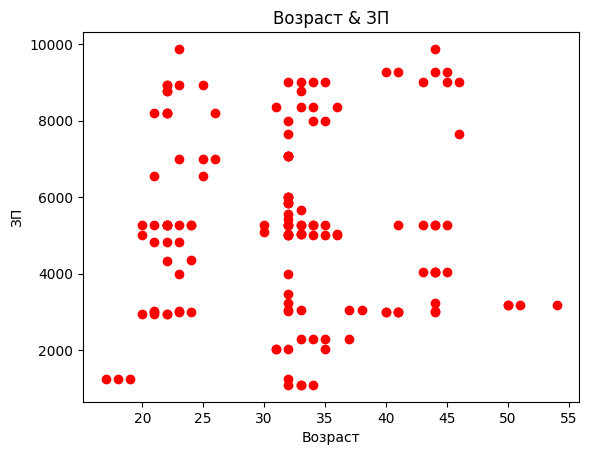

In [257]:
plt.scatter(df1['Age'],df1['Salary'],color='r')
plt.xlabel('Возраст')
plt.ylabel('ЗП')
plt.title("Возраст & ЗП")
plt.show()

Не вижу никакой корреляции между зарплатой и возрастом, после 45 лет люди зарабатывают 2.5к$ стабильно, видимо пенсия

In [258]:
df1.Place.value_counts()

,count
Place,
Mumbai,48
Calcutta,32
Chennai,14
Delhi,14
Cochin,13
Noida,8
Hyderabad,8
Podicherry,3
Pune,2


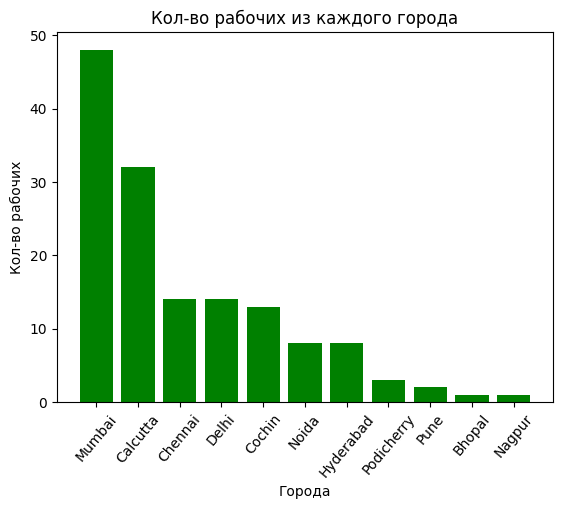

In [259]:
x = df1.Place.value_counts().index
y = df1.Place.value_counts().values

plt.bar(x,y,color='g')
plt.xlabel("Города")
plt.ylabel('Кол-во рабочих')
plt.title("Кол-во рабочих из каждого города")
plt.xticks(rotation=50)
plt.show()

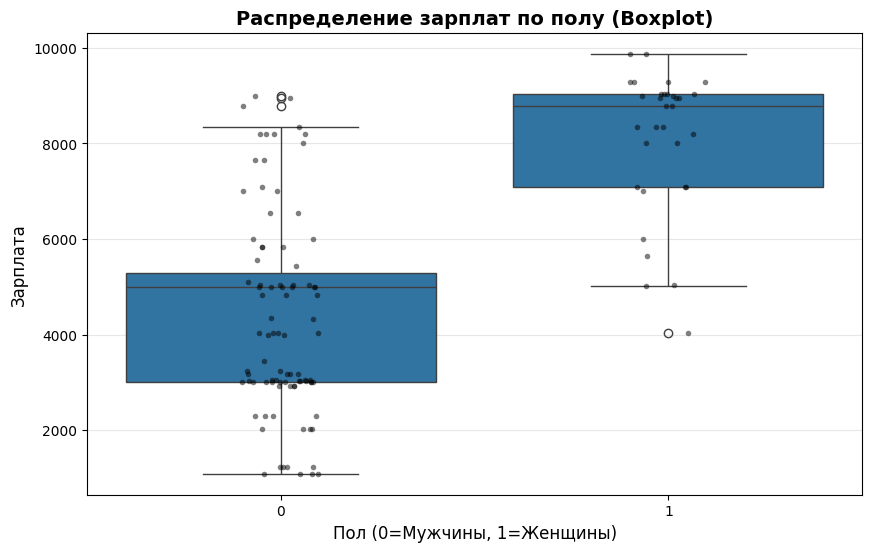

In [260]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, x='Gender', y='Salary')
plt.title('Распределение зарплат по полу (Boxplot)',
          fontsize=14, fontweight='bold')
plt.xlabel('Пол (0=Мужчины, 1=Женщины)', fontsize=12)
plt.ylabel('Зарплата', fontsize=12)
plt.grid(axis='y', alpha=0.3)
sns.stripplot(data=df, x='Gender', y='Salary',
        color='black', alpha=0.5, size=4, jitter=True)
plt.show()

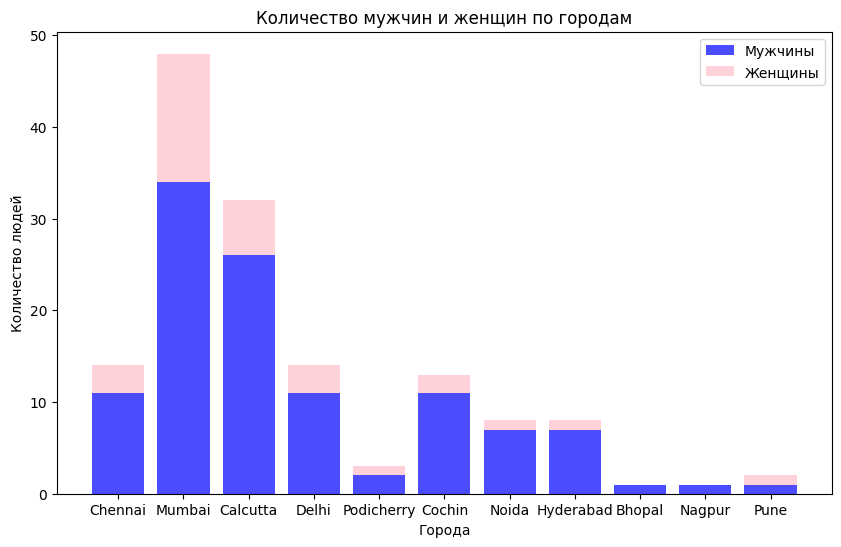

In [261]:
plt.figure(figsize=(10, 6))

cities = df1['Place'].unique()
men_count = []
women_count = []

for city in cities:
    city_data = df1[df1['Place'] == city]
    men = len(city_data[city_data['Gender'] == 0])
    women = len(city_data[city_data['Gender'] == 1])
    men_count.append(men)
    women_count.append(women)

x = range(len(cities))
plt.bar(x, men_count, label='Мужчины', color='blue', alpha=0.7)
plt.bar(x, women_count, bottom=men_count, label='Женщины', color='pink', alpha=0.7)
plt.title('Количество мужчин и женщин по городам')
plt.xlabel('Города')
plt.ylabel('Количество людей')
plt.xticks(x, cities)
plt.legend()
plt.show()

#### Data Encoding

In [262]:
df1.Gender = df1.Gender.apply(lambda x: "M" if x == 0 else 'F')
df1.Gender.unique()


array(['M', 'F'], dtype=object)

In [264]:
df1['Gender'].value_counts()

,count
Gender,
M,112
F,32


In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  136 non-null    object 
 1   Age      127 non-null    float64
 2   Salary   121 non-null    float64
 3   Place    130 non-null    object 
 4   Country  144 non-null    object 
 5   Gender   144 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 6.9+ KB


Company, Place, Country, Gender = object

Изменим это

In [267]:
df1.drop('Country',axis = 1, inplace = True) # Индия одна

In [270]:
df1.Place.unique()

array(['Chennai', 'Mumbai', 'Calcutta', 'Delhi', 'Podicherry', 'Cochin',
       'Noida', 'Hyderabad', 'Bhopal', 'Nagpur', 'Pune'], dtype=object)

In [271]:
df1.Company.unique()


array(['TCS', 'Infosys', 'Cognizant'], dtype=object)

In [276]:
# OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first', sparse_output=False)
df1_ohe = ohe.fit_transform(df[['Company','Place','Gender']])
df1_ohe

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [277]:
ohe.categories_

[array(['Cognizant', 'Infosys', 'TCS', nan], dtype=object),
 array(['Bhopal', 'Calcutta', 'Chennai', 'Cochin', 'Delhi', 'Hyderabad',
        'Mumbai', 'Nagpur', 'Noida', 'Podicherry', 'Pune', nan],
       dtype=object),
 array([0, 1])]

In [278]:
feature_names = ohe.get_feature_names_out(['Company','Place','Gender'])

In [279]:
df_encoded = pd.DataFrame(df1_ohe, columns=feature_names)

In [280]:
df_encoded

,Company_Infosys,Company_TCS,Company_nan,Place_Calcutta,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Podicherry,Place_Pune,Place_nan,Gender_1
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
140,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
141,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
142,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [284]:
df_final = pd.concat([df1[['Age', 'Salary']],
                      df_encoded], axis=1)

In [285]:
df_final.head()

,Age,Salary,Company_Infosys,Company_TCS,Company_nan,Place_Calcutta,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Podicherry,Place_Pune,Place_nan,Gender_1
0,20.0,5283.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,30.0,5283.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,35.0,2300.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,40.0,3000.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,23.0,4000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [287]:
df_final.isnull().sum()

,0
Age,0
Salary,0
Company_Infosys,0
Company_TCS,0
Company_nan,0
Place_Calcutta,0
Place_Chennai,0
Place_Cochin,0
Place_Delhi,0
Place_Hyderabad,0


In [288]:
df_final.dtypes

,0
Age,float64
Salary,float64
Company_Infosys,float64
Company_TCS,float64
Company_nan,float64
Place_Calcutta,float64
Place_Chennai,float64
Place_Cochin,float64
Place_Delhi,float64
Place_Hyderabad,float64


### LabelEncoder

In [289]:
df1.to_csv("Cleaned.csv",index=False)

In [290]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

df2 = pd.read_csv("Cleaned.csv")
df2.Company = label.fit_transform(df2.Company)
df2.head()

,Company,Age,Salary,Place,Gender
0,2,20.0,5283.0,Chennai,M
1,1,30.0,5283.0,Mumbai,M
2,2,35.0,2300.0,Calcutta,M
3,1,40.0,3000.0,Delhi,M
4,2,23.0,4000.0,Mumbai,M


### Feature Scaling

In [292]:
df1.head()

,Company,Age,Salary,Place,Gender
0,TCS,20.0,5283.0,Chennai,M
1,Infosys,30.0,5283.0,Mumbai,M
2,TCS,35.0,2300.0,Calcutta,M
3,Infosys,40.0,3000.0,Delhi,M
4,TCS,23.0,4000.0,Mumbai,M


In [293]:
data = df1.iloc[:,[1,2]]
data

,Age,Salary
0,20.0,5283.0
1,30.0,5283.0
2,35.0,2300.0
3,40.0,3000.0
4,23.0,4000.0
...,...,...
139,22.0,8202.0
140,33.0,9024.0
141,44.0,4034.0
142,33.0,5034.0


In [295]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(data)
data_scaled = scaler.transform(data)
data_scaled

array([[-1.46656902e+00, -1.67718000e-04],
       [-2.47954254e-01, -1.67718000e-04],
       [ 3.61353128e-01, -1.26409057e+00],
       [ 9.70660511e-01, -9.67494526e-01],
       [-1.10098459e+00, -5.43785893e-01],
       [-4.23130127e-03, -1.20077261e-01],
       [-4.23130127e-03,  3.03631371e-01],
       [-1.10098459e+00,  7.27340004e-01],
       [ 2.39491652e-01,  1.15104864e+00],
       [ 1.57996789e+00,  1.57475727e+00],
       [-1.10098459e+00, -1.67718000e-04],
       [ 2.39491652e-01, -1.77720172e+00],
       [ 1.57996789e+00, -1.67718000e-04],
       [-1.71029197e+00, -1.71576397e+00],
       [ 9.70660511e-01, -9.67494526e-01],
       [-1.10098459e+00, -9.67494526e-01],
       [-1.10098459e+00, -9.54783267e-01],
       [ 2.39491652e-01, -1.20077261e-01],
       [-1.22284607e+00, -1.67718000e-04],
       [-4.23130127e-03, -1.67718000e-04],
       [ 6.05076081e-01, -9.48427637e-01],
       [ 2.18927528e+00, -8.89532137e-01],
       [-1.34470754e+00, -1.94649980e-01],
       [-4.

In [297]:
data_scaled.mean(axis=0)

array([8.17247504e-17, 1.03312420e-16])

In [298]:
scaled_data_set=pd.DataFrame(data_scaled,columns=data.columns)
scaled_data_set

,Age,Salary
0,-1.466569,-0.000168
1,-0.247954,-0.000168
2,0.361353,-1.264091
3,0.970661,-0.967495
4,-1.100985,-0.543786
...,...,...
139,-1.222846,1.236638
140,0.117630,1.584926
141,1.458106,-0.529380
142,0.117630,-0.105671


### MinMaxScaler

In [300]:
data=df.iloc[ : ,[1,2]]
data

,Age,Salary
0,20.0,NaN
1,30.0,NaN
2,35.0,2300.0
3,40.0,3000.0
4,23.0,4000.0
...,...,...
139,22.0,8202.0
140,33.0,9024.0
141,44.0,4034.0
142,33.0,5034.0


In [301]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler().fit(data)
scaler.data_min_

array([   0., 1089.])

In [303]:
scaler.data_max_

array([  54., 9876.])

In [304]:
data.describe()

,Age,Salary
count,127.000000,121.000000
mean,30.527559,5283.471074
std,11.114717,2585.373600
min,0.000000,1089.000000
25%,22.000000,3030.000000
50%,33.000000,5000.000000
75%,37.500000,8000.000000
max,54.000000,9876.000000


In [305]:
scaler.feature_range

(0, 1)